Perform the following steps:
1.	Perform data quality check by checking for missing values if any.
2.	Understand what factors contributed most to employee turnover by EDA.
2.1.	Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.
2.2.	Draw the distribution plot of 
■	Employee Satisfaction (use column satisfaction_level)
■	Employee Evaluation (use column last_evaluation)
■	Employee Average Monthly Hours (use column average_montly_hours)
2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.
3.	Perform clustering of Employees who left based on their satisfaction and evaluation.
3.1.	Choose columns satisfaction_level, last_evaluation and left.
3.2.	Do KMeans clustering of employees who left the company into 3 clusters.
3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.
4.	Handle the left Class Imbalance using SMOTE technique.
4.1.	Pre-Process the data by converting categorical columns to numerical columns by
■	Separating categorical variables and numeric variables.
■	Applying get_dummies() to the categorical variables.
■	Combining categorical variables and numeric variables.
4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
4.3.	Upsample the train dataset using SMOTE technique from the imblearn module.
5.	Perform 5-Fold cross-validation model training and evaluate performance. 
5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.
5.2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.
5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.
6.	Identify the best model and justify the evaluation metrics used. 
6.1.	Find the ROC/AUC for each model and plot the ROC curve.
6.2.	Find the confusion matrix for each of the models.
6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?
7.	Suggest various retention strategies for targeted employees.
7.1.	Using the best model, predict the probability of employee turnover in the test data.
7.2.	Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
■	Safe Zone (Green) (Score < 20%)
■	Low Risk Zone (Yellow) (20% < Score < 60%)
■	Medium Risk Zone (Orange) (60% < Score < 90%)
■	High Risk Zone (Red) (Score > 90%).


In [1]:
from sklearn.preprocessing import Normalizer, normalize, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split as tts, cross_val_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC
from sklearn.metrics import classification_report,roc_curve, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from pandas import read_excel, DataFrame, Series, get_dummies
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
# c:\programdata\anaconda3\lib\site-packages

In [2]:
empd = read_excel('1673873196_hr_comma_sep.xlsx')
print(empd.shape)
empd.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#[k for k in empd.dtypes] #.filter(['object'])
numcols = empd.select_dtypes(exclude='object').columns

In [4]:
empd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
empd.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>],
       [<Axes: title={'center': 'number_project'}>,
        <Axes: title={'center': 'average_montly_hours'}>],
       [<Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>],
       [<Axes: title={'center': 'left'}>,
        <Axes: title={'center': 'promotion_last_5years'}>]], dtype=object)

<Figure size 1500x1500 with 0 Axes>

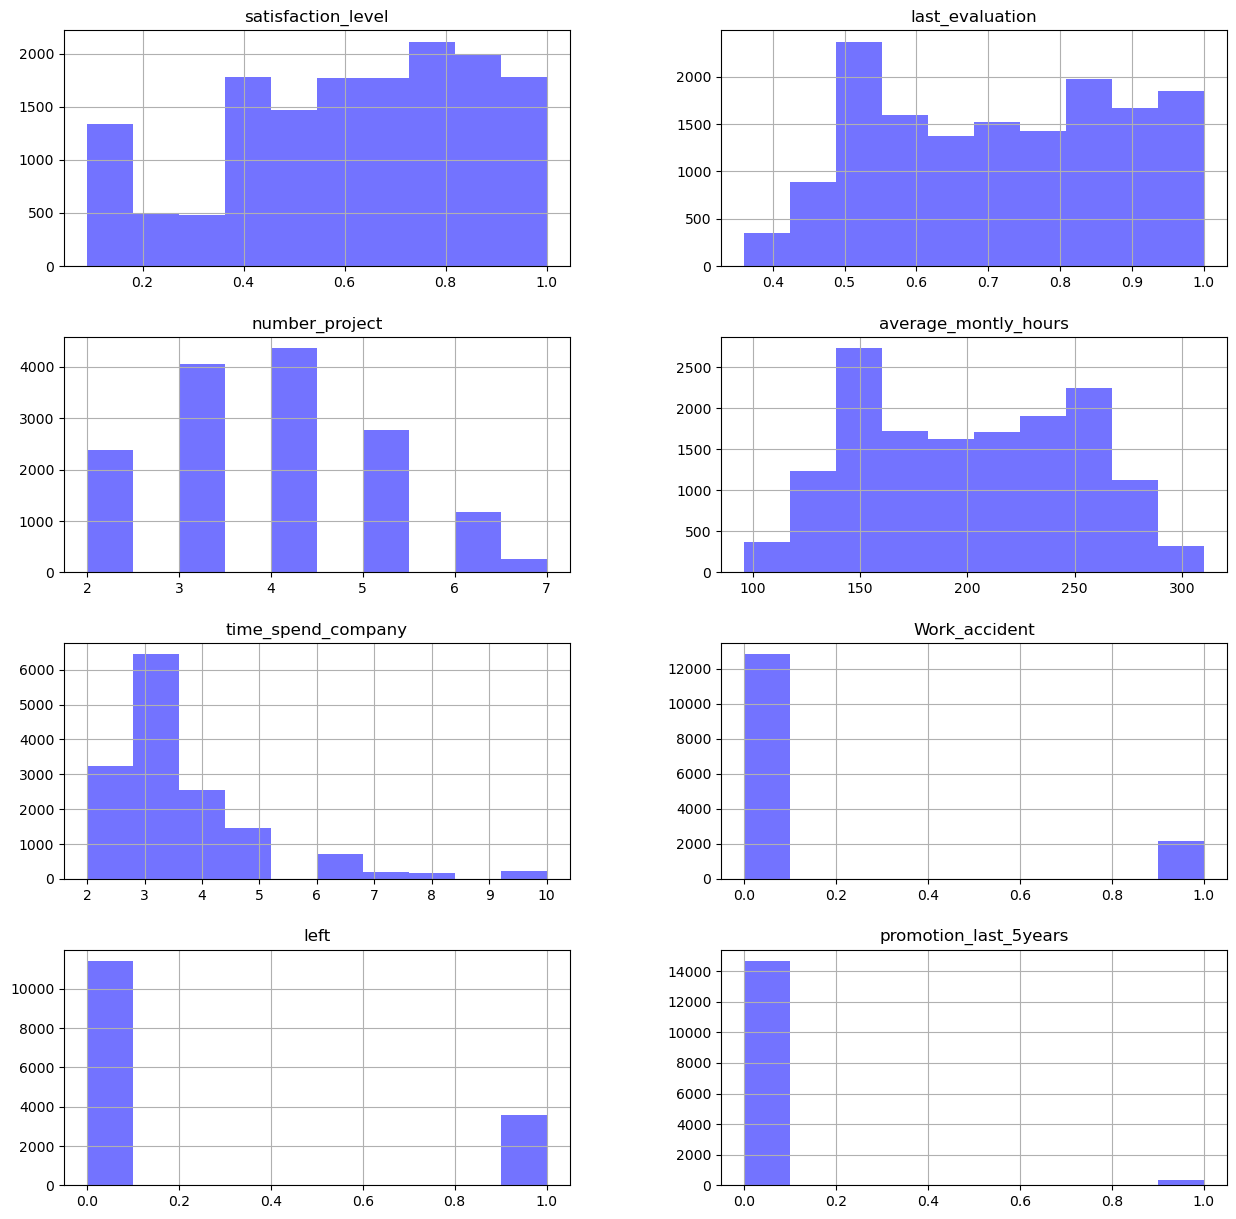

In [6]:
plt.figure(figsize=(15,15))
empd[numcols].hist(color='b',alpha=0.55, bins=10,
                    layout=(4,2), figsize=(15,15) )

array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>],
       [<Axes: title={'center': 'number_project'}>,
        <Axes: title={'center': 'average_montly_hours'}>],
       [<Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>],
       [<Axes: title={'center': 'left'}>,
        <Axes: title={'center': 'promotion_last_5years'}>]], dtype=object)

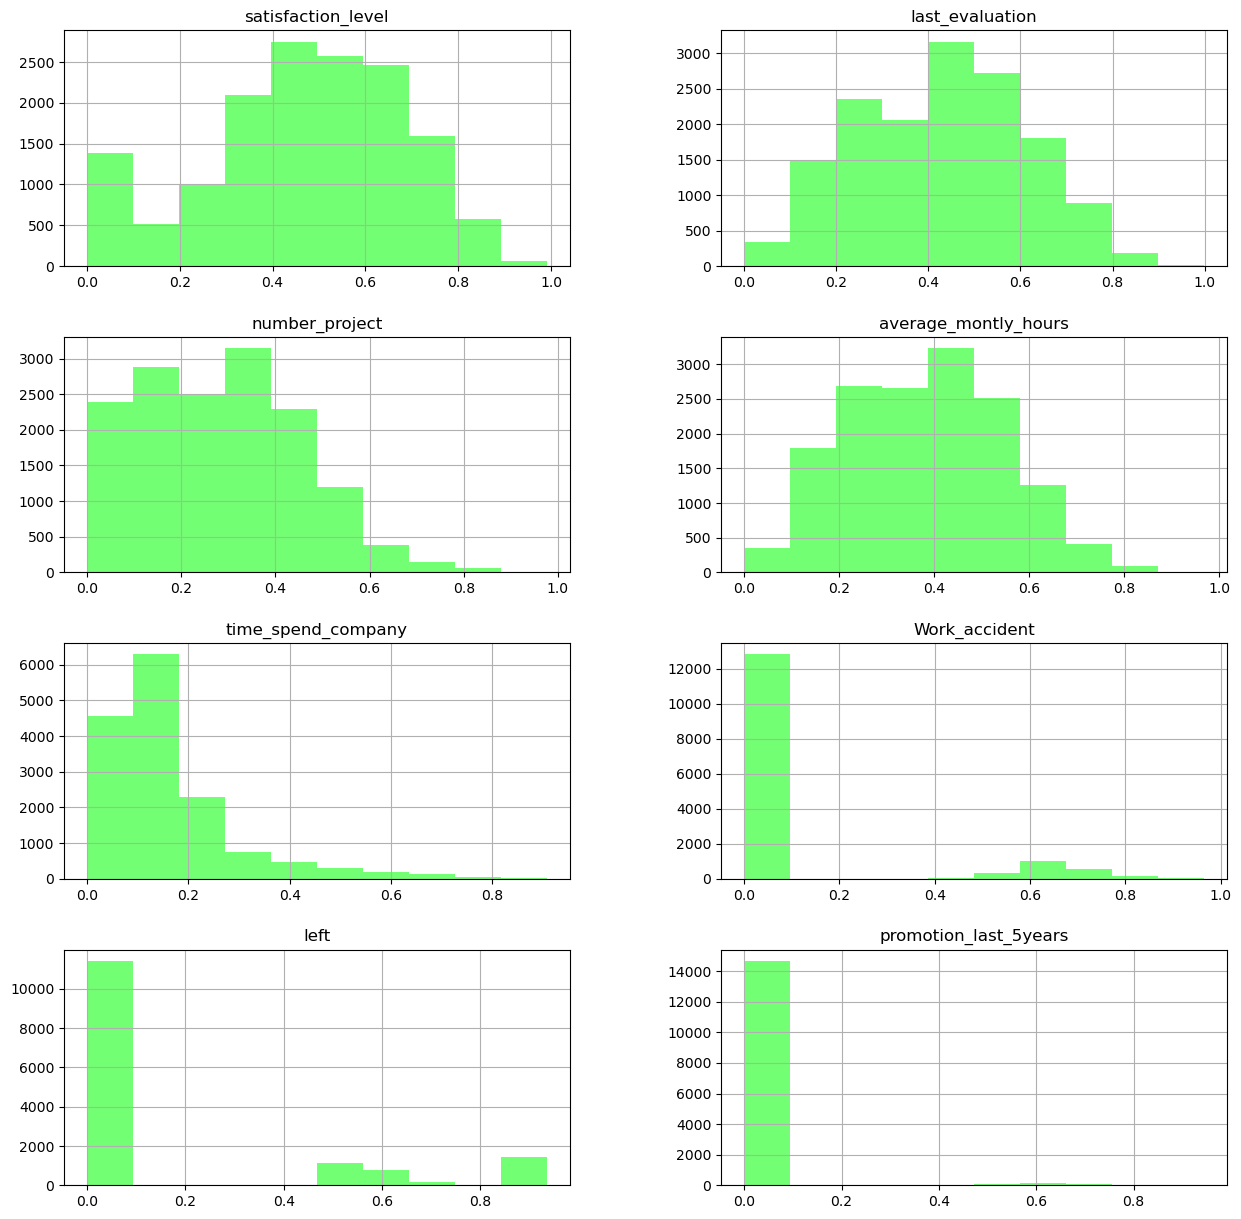

In [7]:
# scl_empd = DataFrame(normalize(normalize(X=MinMaxScaler().fit_transform(empd[numcols]),axis=1),axis=0), columns=numcols)
scl_empd = DataFrame(normalize(X=MinMaxScaler().fit_transform(empd[numcols]),axis=1, norm='l2'), columns=numcols)
# MinMaxScaler().fit_transform(empd[numcols])
scl_empd.hist(color='lime',alpha=0.55, bins=10,
                    layout=(4,2), figsize=(15,15) )

In [8]:
empd['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [9]:
tt = empd['left'].value_counts()
tt[1]/(tt[0]+tt[1])

0.2380825388359224

<Axes: >

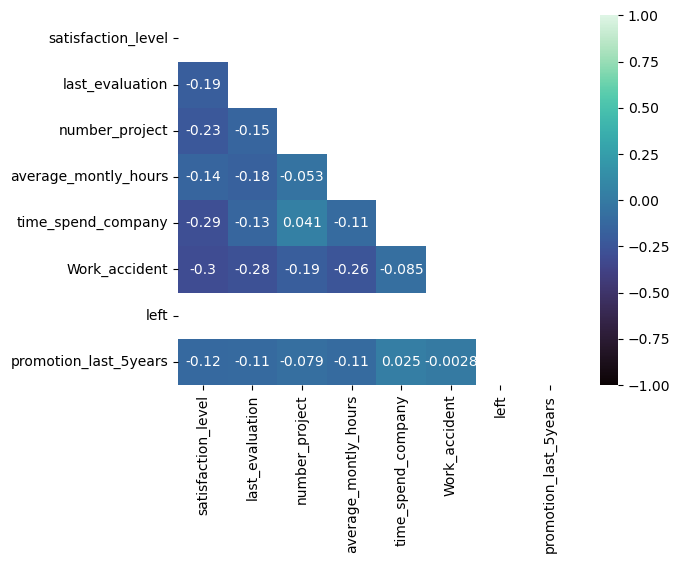

In [10]:
# cor = empd[numcols][empd[numcols]['left']==1].corr()
#retained
cor = scl_empd[scl_empd['left']<0.4].corr()
mask = np.triu(np.ones_like(cor))
sns.heatmap(cor, vmin=-1, vmax=1,
            annot=True, cmap='mako', mask=mask)

In [11]:
# cor0 = scl_empd[scl_empd['left']>0.4].corr('spearman')
# mask0 = np.triu(np.ones_like(cor0))
# sns.heatmap(cor0, vmin=-1, vmax=1,
#             annot=True, cmap='coolwarm', mask=mask0)

<Axes: >

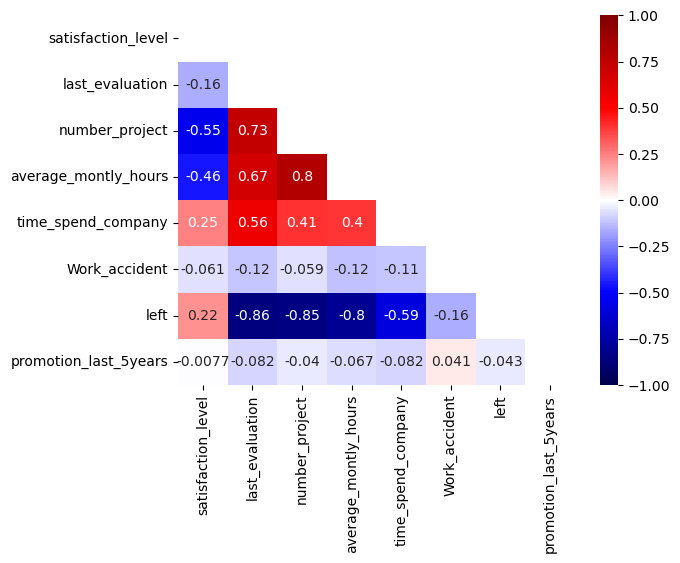

In [12]:
# left
cor1 = scl_empd[scl_empd['left']>0.4].corr('pearson')
mask1 = np.triu(np.ones_like(cor1))
sns.heatmap(cor1, vmin=-1, vmax=1,
            annot=True, cmap='seismic', mask=mask1)

<Axes: xlabel='number_project', ylabel='Count'>

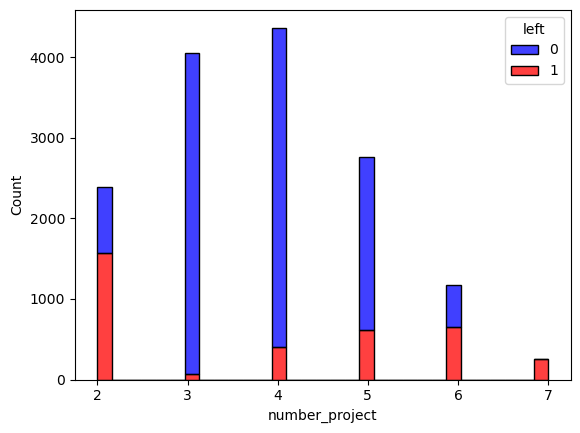

In [13]:
sns.histplot(data=empd, x="number_project", hue="left", multiple="stack", palette=['blue','red'])

In [14]:
prjnum = empd[['number_project', 'left']].groupby(['number_project']).value_counts(sort=False)

print(prjnum.values[[1,3,5]]/np.sum(np.append(prjnum.values[1::2],[256])),np.sum(np.append(prjnum.values[1::2],[256])))

[0.43881266 0.02016242 0.11453374] 3571


#### 44% of the employees out of 3571 who left the organization had only 2 assigned projects
#### 3 and 4 projects per employee has least 2%, 11% attrition
#### All employees with 7 projects left the organization

In [15]:
# clus3 = KMeans(n_clusters=3,n_init=10,random_state=10).fit_predict(empd[['satisfaction_level','last_evaluation','left']])
unscl = empd[['satisfaction_level','last_evaluation','left']][empd['left']==1]
# scl_empd[scl_empd['left']>0.4]
clus3 = KMeans(n_clusters=3,n_init=10,random_state=10).fit(unscl)

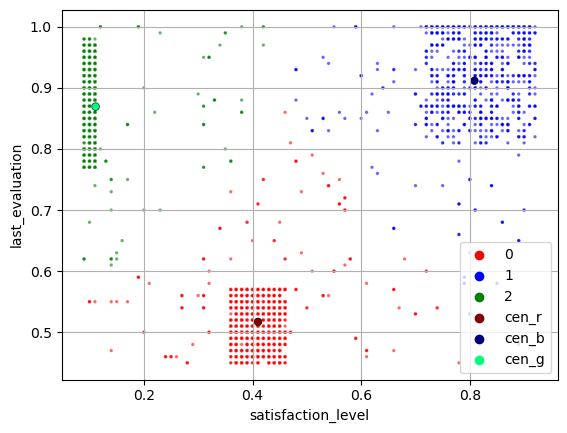

In [16]:
ax = sns.scatterplot(data=unscl, y='last_evaluation', x='satisfaction_level',
                     hue= clus3.labels_, palette=['red', 'blue', 'green'], s=6, alpha=0.6)
ax = sns.scatterplot(x=clus3.cluster_centers_[:, 0], y=clus3.cluster_centers_[:, 1], s=30,
                     hue=['cen_r','cen_b','cen_g'], palette=['maroon', 'navy', 'springgreen'], ec='black')
plt.grid()
plt.show()

<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

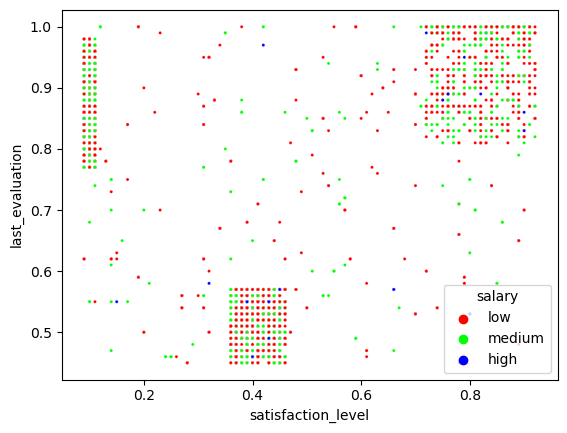

In [17]:
sns.scatterplot(y=empd['last_evaluation'][empd['left']>0], x=empd['satisfaction_level'][empd['left']>0], s=5,
               hue=empd['salary'][empd['left']>0], palette=['r','lime','b'])

<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

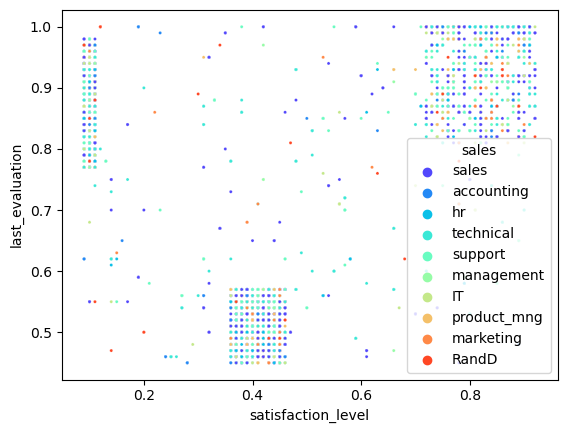

In [18]:
sns.scatterplot(y=empd['last_evaluation'][empd['left']>0], x=empd['satisfaction_level'][empd['left']>0], s=5,
               hue=empd['sales'][empd['left']>0], palette='rainbow')

#### w.r.t higher (satisfaction_level, last_evaluation), $\approx$ points greater than (0.7,0.8) are the majority people with medium and low salaries who have left the organization
#### overall employees who left had last_evaluation > 0.7 , last_evaluation has greater influnce than satifaction_level on the employees who have quit the organization  

In [19]:
# if columns=None, get_dummies does split-apply-combine automatically 
empdohe = get_dummies(data=empd, columns=None)
empdohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales_IT               14999 non-null  uint8  
 9   sales_RandD            14999 non-null  uint8  
 10  sales_accounting       14999 non-null  uint8  
 11  sales_hr               14999 non-null  uint8  
 12  sales_management       14999 non-null  uint8  
 13  sales_marketing        14999 non-null  uint8  
 14  sales_product_mng      14999 non-null  uint8  
 15  sa

In [20]:
target = empdohe.left
emptrain = empdohe.drop(columns='left')
X_train, X_test, y_train, y_test = tts(emptrain, target, test_size=0.2, random_state=123, stratify=target)

In [21]:
print(len(X_train)/len(emptrain), len(y_test)/len(emptrain))

0.7999866657777185 0.20001333422228149


In [22]:
upsample = SMOTE()
X_up, y_up = upsample.fit_resample(X_train, y_train)

print(Counter(y_train),'\n',Counter(y_up))

Counter({0: 9142, 1: 2857}) 
 Counter({0: 9142, 1: 9142})


<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

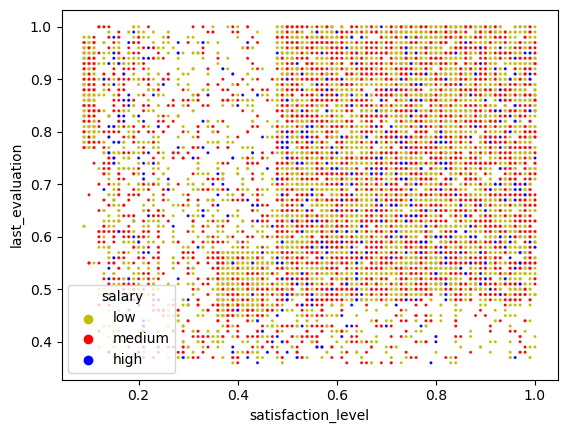

In [23]:
sns.scatterplot(y=empd['last_evaluation'], x=empd['satisfaction_level'], s=5,
               hue=empd['salary'], palette=['y','r','b'])

<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

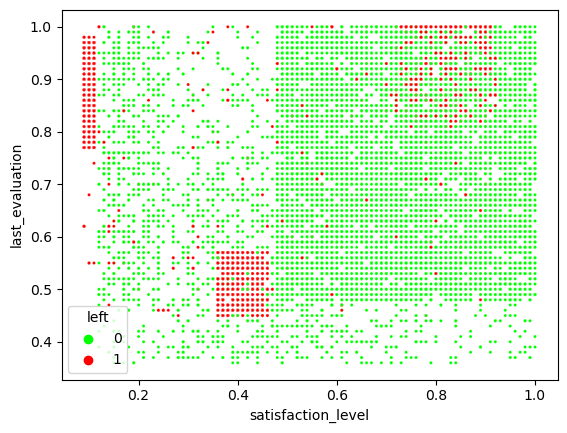

In [24]:
sns.scatterplot(y=X_train['last_evaluation'], x=X_train['satisfaction_level'], s=5,
               hue=y_train, palette=['lime','r'])

<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

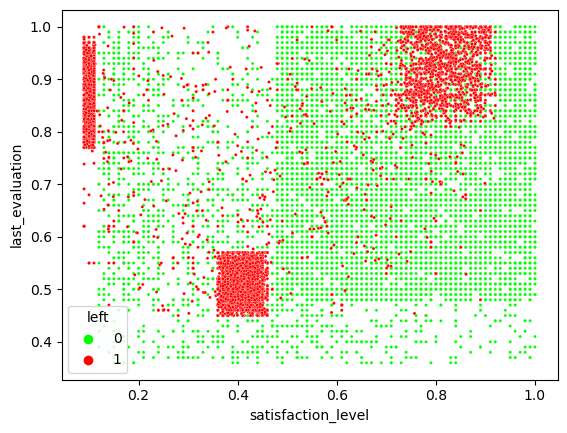

In [25]:
sns.scatterplot(y=X_up['last_evaluation'], x=X_up['satisfaction_level'], s=5,
               hue=y_up, palette=['lime','r'])

In [29]:
clfrs = [LR(random_state=42), RFC(random_state=42), GBC(random_state=42)]
# classification_report(y_true, y_pred, target_names=target_names)
def predcv5rpt(train,test,clf):
    fits = [cl.fit(train[0],test[0]) for cl in clf]
    pred = [ft.predict(train[1]) for ft in fits]
    cv5 = [cross_val_score(clfr,train[0],test[0],cv=5) for clfr in clf]
    rpt = [classification_report(test[1],prd,target_names=['retained', 'left']) for prd in pred]
    print('lr',cv5[0],'\n',rpt[0])
    print('rfc',cv5[1],'\n',rpt[1])
    print('gbc',cv5[2],'\n',rpt[2])
    rocs = [[roc_curve(test[1], ft.predict_proba(train[1])[::,1]),
             roc_auc_score(test[1], ft.predict_proba(train[1])[::,1])] for ft in fits]
    return rocs, fits, pred
train = (X_up,X_test)
test = (y_up,y_test)
rocs, fits, pred = predcv5rpt(train,test,clfrs)

lr [0.75909215 0.7815149  0.80038283 0.80776593 0.8202954 ] 
               precision    recall  f1-score   support

    retained       0.92      0.77      0.83      2286
        left       0.51      0.78      0.62       714

    accuracy                           0.77      3000
   macro avg       0.71      0.77      0.73      3000
weighted avg       0.82      0.77      0.78      3000

rfc [0.98003828 0.98085863 0.98660104 0.98496035 0.98386214] 
               precision    recall  f1-score   support

    retained       0.99      0.99      0.99      2286
        left       0.97      0.98      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

gbc [0.95870932 0.96035001 0.9630845  0.9630845  0.95842451] 
               precision    recall  f1-score   support

    retained       0.98      0.97      0.98      2286
        left       0.92      0.94      0.93      

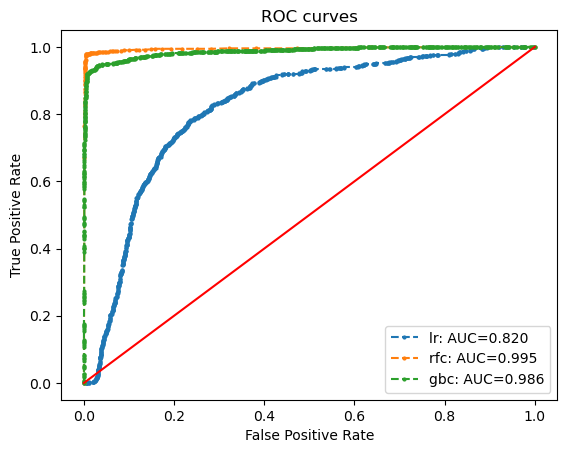

In [36]:
lbl = ['lr','rfc','gbc']
for a in range(0,3):
    plt.plot(rocs[a][0][0],rocs[a][0][1], '--o', label=lbl[a]+': AUC=%.3f'%rocs[a][1], markersize=2)

plt.plot([0,.2,.4,.6,.8,1],[0,.2,.4,.6,.8,1],'r-')
plt.title("ROC curves")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

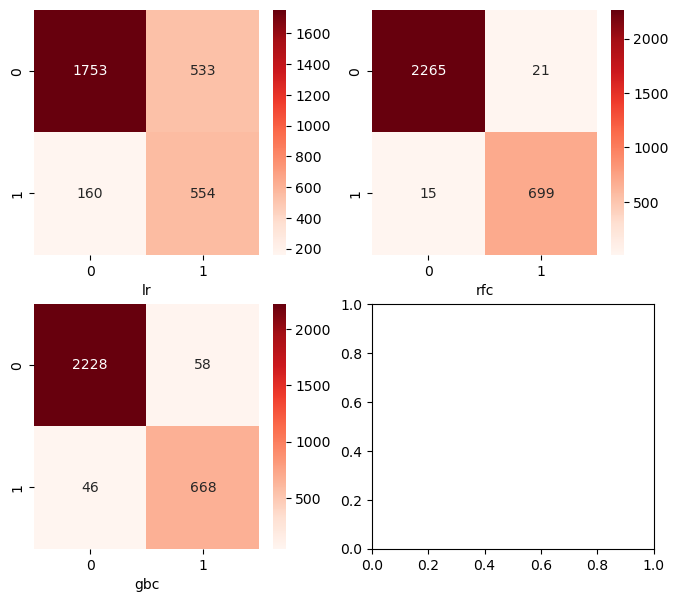

In [37]:
# tn, fp, fn, tp 

fig, axes = plt.subplots(2, 2, figsize=(8, 7))
f = [(0,0),(0,1),(1,0)]
for p in range(3):
#     plt.figure()
    j,k = f[p]
    xx = sns.heatmap(DataFrame(confusion_matrix(test[1],pred[p])),
                     annot=True, cmap="Reds", fmt='g', ax = axes[j,k])
    xx.set(xlabel=lbl[p])


### higher recall score affects attrition as the vulnerability of the employees goes unnoticed

<Axes: xlabel='zone', ylabel='Count'>

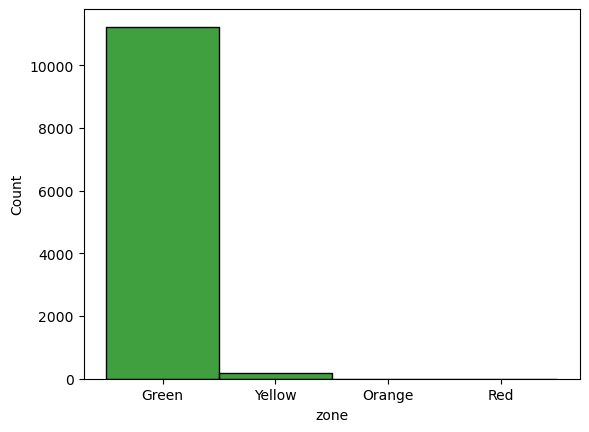

In [58]:
# for the retained employees, rfc predection_probablity for attrition
retained_rfc_prob = DataFrame(fits[1].predict_proba(emptrain[target<1])[:,1], columns=['rfc_prob'])
safe = retained_rfc_prob['rfc_prob']<0.2
low_risk = (retained_rfc_prob['rfc_prob']>=0.2) & (retained_rfc_prob['rfc_prob']<0.6)
med_risk = (retained_rfc_prob['rfc_prob']>=0.6) & (retained_rfc_prob['rfc_prob']<0.9)
high_risk = retained_rfc_prob['rfc_prob']>=0.9
retained_rfc_prob.loc[safe,'zone'] = 'Green'
retained_rfc_prob.loc[low_risk,'zone'] = 'Yellow'
retained_rfc_prob.loc[med_risk,'zone'] = 'Orange'
retained_rfc_prob.loc[high_risk,'zone'] = 'Red'
sns.histplot(data=retained_rfc_prob, x="zone", color='green')

<Axes: xlabel='zone', ylabel='Count'>

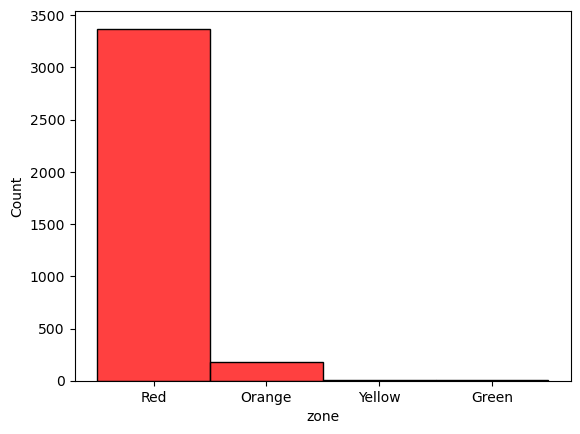

In [57]:
# for the left employees, rfc predection_probablity for attrition
left_rfc_prob = DataFrame(fits[1].predict_proba(emptrain[target>0])[:,1], columns=['rfc_prob'])
safe = retained_rfc_prob['rfc_prob']<0.2
low_risk = (left_rfc_prob['rfc_prob']>=0.2) & (left_rfc_prob['rfc_prob']<0.6)
med_risk = (left_rfc_prob['rfc_prob']>=0.6) & (left_rfc_prob['rfc_prob']<0.9)
high_risk = left_rfc_prob['rfc_prob']>=0.9
left_rfc_prob.loc[safe,'zone'] = 'Green'
left_rfc_prob.loc[low_risk,'zone'] = 'Yellow'
left_rfc_prob.loc[med_risk,'zone'] = 'Orange'
left_rfc_prob.loc[high_risk,'zone'] = 'Red'
sns.histplot(data=left_rfc_prob, x="zone", color='r')

In [29]:
empd['number_project'].value_counts()
# indexes = prjnum.index
# DataFrame('#of_employees':prjnum.values())

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [90]:
prjnum = empd[['number_project', 'left']].groupby(['number_project']).value_counts(sort=False)
prjnum

number_project  left
2               0        821
                1       1567
3               0       3983
                1         72
4               0       3956
                1        409
5               0       2149
                1        612
6               0        519
                1        655
7               1        256
dtype: int64

<Axes: title={'center': 'Employees Count'}, xlabel='number_project', ylabel='Counts'>

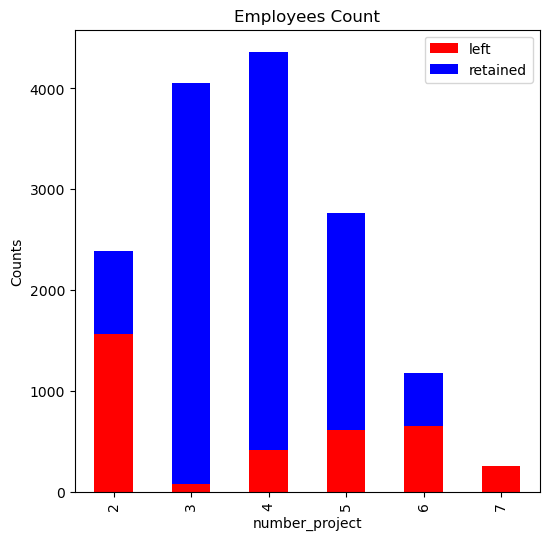

In [88]:
DataFrame({'left':np.append(prjnum.values[1::2],[256]),'retained':np.append(prjnum.values[0:-1:2],[0])},
          index=[2,3,4,5,6,7]).plot(kind='bar', stacked=True,
        color=['r','b'], figsize=(6,6), 
        title='Employees Count', xlabel ='number_project',
       ylabel='Counts')

In [93]:
print(len(prjnum.index), len(prjnum.values))

11 11
